# Data Processing for Anastasia

## Preamble

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../')

import physics as phys

import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import RegularGridInterpolator

import pickle


Bad key text.latex.preview in file matplotlibrc, line 14 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
import matplotlib.pylab as pylab
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Import Raw Data

In [5]:
data_dir = '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug'

mm_string_list = ['10_MeV', '30_MeV', '100_MeV', '300_MeV', '1_GeV', '3_GeV', '10_GeV', 
'30_GeV', '100_GeV', '300_GeV']

# m_m x Q x V x z x [Tb, Tm, Tc, Vbm, Vmc, xe]
raw_data = np.array([pickle.load(open(data_dir+'/data_Vrel_m_m_'+mm_string+'_m_C_100_MeV.p', 'rb'))[0] for mm_string in mm_string_list])

# Q x V x z x m_m x [Tb, Tm, Tc, Vbm, Vmc, xe]
raw_data = np.moveaxis(raw_data, 0, -2)

Q_ary     = 10**np.arange(-6., 0.2, 0.2) # 31 entries

V_rel_ary = np.arange(0., 4.1, 0.103) 

rs_vec   = np.flipud(np.arange(10., 4000., 1))

print(raw_data.shape)


Text(0, 0.5, '$T_b$ [eV]')

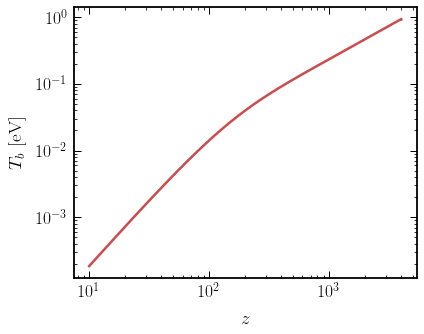

In [24]:
plt.figure()

plt.loglog()

plt.plot(rs_vec, raw_data[0,0,:,0,0])

plt.xlabel(r'$z$')
plt.ylabel(r'$T_b$ [eV]')

## Target Binning

In [6]:
data_folder = '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/'

Vlis = np.loadtxt(open(data_folder+'Vlis.csv'), delimiter=',')
Qlis = np.loadtxt(open(data_folder+'Qlis.csv'), delimiter=',')
zlis = np.loadtxt(open(data_folder+'zlis.csv'), delimiter=',')

## Interpolator Object

In [7]:
interp_func = RegularGridInterpolator((Q_ary, V_rel_ary), raw_data)

In [8]:

pts = np.array([[[Q, V] for V in Vlis] for Q in Qlis])

data = interp_func(pts)

In [9]:
data.shape

(90, 161, 3990, 10, 6)

In [10]:
data_dict = {'Q': Qlis, 'V': Vlis, 'z': rs_vec, 'm_m': mm_string_list, 'inputs': '[Tb, Tm, Tc, Vbm, Vmc, xe]', 'data': data}

pickle.dump(data_dict, open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/compiled_data.p', 'wb')) 

In [30]:
z_vec_for_Anastasia = rs_vec[-22:] - 1

# z x m_m x Q x V 
data_for_Anastasia = np.transpose(data[:,:,-22:,:,0], axes=(2, 3, 0, 1))

print(data_for_Anastasia.shape)

(22, 10, 90, 161)


Text(0, 0.5, '$T_b$ [K]')

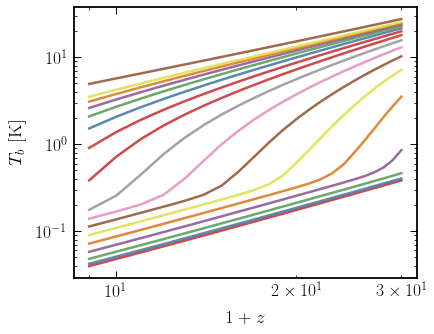

In [32]:
plt.figure()

plt.loglog()

plt.plot(z_vec_for_Anastasia, data_for_Anastasia[:, 2, 70, ::10] / phys.kB) 

plt.xlabel(r'$1+z$')
plt.ylabel(r'$T_b$ [K]')

In [34]:
for i,z in enumerate(z_vec_for_Anastasia): 

    for j,mm_str in enumerate(mm_string_list): 

        np.savetxt(
            '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/mc100MeV_mm'
            + mm_str + '_z_'+str(int(z))+'.csv', data_for_Anastasia[i,j,:,:], delimiter=','
        )

np.savetxt('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/Vlis.csv', Vlis, delimiter=',')
np.savetxt('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/Qlis.csv', Qlis, delimiter=',')
np.savetxt('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/zlis.csv', z_vec_for_Anastasia, delimiter=',')